<a href="https://colab.research.google.com/github/2303A51376/Natural-Language-Processing/blob/main/LAB7_1376.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install nltk

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def preprocess_text(text):
    """
    Tokenizes, removes stopwords, and lemmatizes the input text.

    Args:
        text (str): The input text string.

    Returns:
        str: The processed text string.
    """
    # Convert to lowercase
    text = text.lower()

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

    processed_text = ' '.join(lemmatized_tokens)

    return processed_text

In [33]:
import pandas as pd
# Combine the 'descr' and 'tags' columns, handling potential missing values
df['combined_text'] = df['descr'].fillna('') + ' ' + df['tags'].fillna('')

# Apply the preprocess_text function to the combined text column
df['preprocessed_text'] = df['combined_text'].apply(preprocess_text)

# Display the first few rows with the new columns
display(df.head())

,Unnamed: 0,descr,tags,combined_text,preprocessed_text
0,0,chelsea sack mutu chelsea have sacked adrian ...,"sports, stamford bridge, football association,...",chelsea sack mutu chelsea have sacked adrian ...,chelsea sack mutu chelsea sacked adrian mutu f...
1,1,record fails to lift lacklustre meet yelena i...,"sports, madrid, birmingham, france, scotland, ...",record fails to lift lacklustre meet yelena i...,record fails lift lacklustre meet yelena isinb...
2,2,edu describes tunnel fracas arsenals edu has ...,"sports, derby, brazil, tunnel fracasedu, food,...",edu describes tunnel fracas arsenals edu has ...,edu describes tunnel fracas arsenal edu lifted...
3,3,ogara revels in ireland victory ireland flyha...,"sports, bbc, united kingdom, ireland, brian o'...",ogara revels in ireland victory ireland flyha...,ogara revel ireland victory ireland flyhalf ro...
4,4,unclear future for striker baros liverpool fo...,"sports, liverpool, daily sport, millennium sta...",unclear future for striker baros liverpool fo...,unclear future striker baros liverpool forward...


In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [35]:
# Combine the 'descr' and 'tags' columns, handling potential missing values
df['combined_text'] = df['descr'].fillna('') + ' ' + df['tags'].fillna('')

# Apply the preprocess_text function to the combined text column
df['preprocessed_text'] = df['combined_text'].apply(preprocess_text)

# Display the first few rows with the new columns
display(df.head())

,Unnamed: 0,descr,tags,combined_text,preprocessed_text
0,0,chelsea sack mutu chelsea have sacked adrian ...,"sports, stamford bridge, football association,...",chelsea sack mutu chelsea have sacked adrian ...,chelsea sack mutu chelsea sacked adrian mutu f...
1,1,record fails to lift lacklustre meet yelena i...,"sports, madrid, birmingham, france, scotland, ...",record fails to lift lacklustre meet yelena i...,record fails lift lacklustre meet yelena isinb...
2,2,edu describes tunnel fracas arsenals edu has ...,"sports, derby, brazil, tunnel fracasedu, food,...",edu describes tunnel fracas arsenals edu has ...,edu describes tunnel fracas arsenal edu lifted...
3,3,ogara revels in ireland victory ireland flyha...,"sports, bbc, united kingdom, ireland, brian o'...",ogara revels in ireland victory ireland flyha...,ogara revel ireland victory ireland flyhalf ro...
4,4,unclear future for striker baros liverpool fo...,"sports, liverpool, daily sport, millennium sta...",unclear future for striker baros liverpool fo...,unclear future striker baros liverpool forward...


In [ ]:
display(df.head())

,",descr,tags",preprocessed_text
0,"0,chelsea sack mutu chelsea have sacked adria...",chelsea sack mutu chelsea sacked adrian mutu f...
1,"1,record fails to lift lacklustre meet yelena...",record fails lift lacklustre meet yelena isinb...
2,"2,edu describes tunnel fracas arsenals edu ha...",edu describes tunnel fracas arsenal edu lifted...
3,"3,ogara revels in ireland victory ireland fly...",ogara revel ireland victory ireland flyhalf ro...
4,"4,unclear future for striker baros liverpool ...",unclear future striker baros liverpool forward...


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['preprocessed_text'])

print("TF-IDF matrix shape:", tfidf_matrix.shape)

TF-IDF matrix shape: (758, 16605)


In [16]:
from sklearn.decomposition import LatentDirichletAllocation

lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(tfidf_matrix)

LatentDirichletAllocation(n_components=5, random_state=42)

In [17]:
from sklearn.decomposition import NMF

nmf_model = NMF(n_components=5, random_state=42)
nmf_model.fit(tfidf_matrix)

NMF(n_components=5, random_state=42)

In [25]:
def get_top_n_words(model, feature_names, n):
    """
    Gets the top N words for each topic from a topic model.

    Args:
        model: The fitted topic model (LDA or NMF).
        feature_names (list): The list of feature names (words).
        n (int): The number of top words to retrieve per topic.

    Returns:
        list: A list of lists, where each inner list contains the top words for a topic.
    """
    top_words = []
    for topic_weights in model.components_:
        top_word_indices = topic_weights.argsort()[-n:][::-1]
        topic_top_words = [feature_names[i] for i in top_word_indices]
        top_words.append(topic_top_words)
    return top_words

feature_names = vectorizer.get_feature_names_out()
n_top_words = 15

lda_top_words = get_top_n_words(lda_model, feature_names, n_top_words)
nmf_top_words = get_top_n_words(nmf_model, feature_names, n_top_words)

print("Top words for LDA topics:")
for i, topic_words in enumerate(lda_top_words):
    print(f"Topic {i+1}: {', '.join(topic_words)}")

print("\nTop words for NMF topics:")
for i, topic_words in enumerate(nmf_top_words):
    print(f"Topic {i+1}: {', '.join(topic_words)}")

Top words for LDA topics:
Topic 1: kenteris, thanou, greek, iaaf, radcliffe, tzekos, katerina, christos, kostas, chepkemei, federation, cabir, chicago, seafarer, hopman
Topic 2: hoddle, argonaut, wolf, gebrselassie, yelling, jansen, hiphop, hayley, bowen, millan, steinmetz, hyde, sorrell, lorenzo, tergat
Topic 3: simonetti, rfid, delta, airline, desailly, ajax, yelling, ethiopia, curbishley, dibaba, iran, kathy, blogger, lol, kluivert
Topic 4: said, game, technology, mr, mobile, people, player, software, rugby, phone, would, service, new, sport, year
Topic 5: printer, lycos, screensaver, cartridge, newry, weir, inkjet, paniccia, laser, larne, santini, seychelles, optic, mauritius, fibre

Top words for NMF topics:
Topic 1: mobile, phone, technology, camera, service, handset, people, broadband, network, digital, music, bt, multimedia, operator, said
Topic 2: rugby, england, ireland, game, sport, football, cup, injury, coach, robinson, wale, player, league, union, france
Topic 3: labour, 

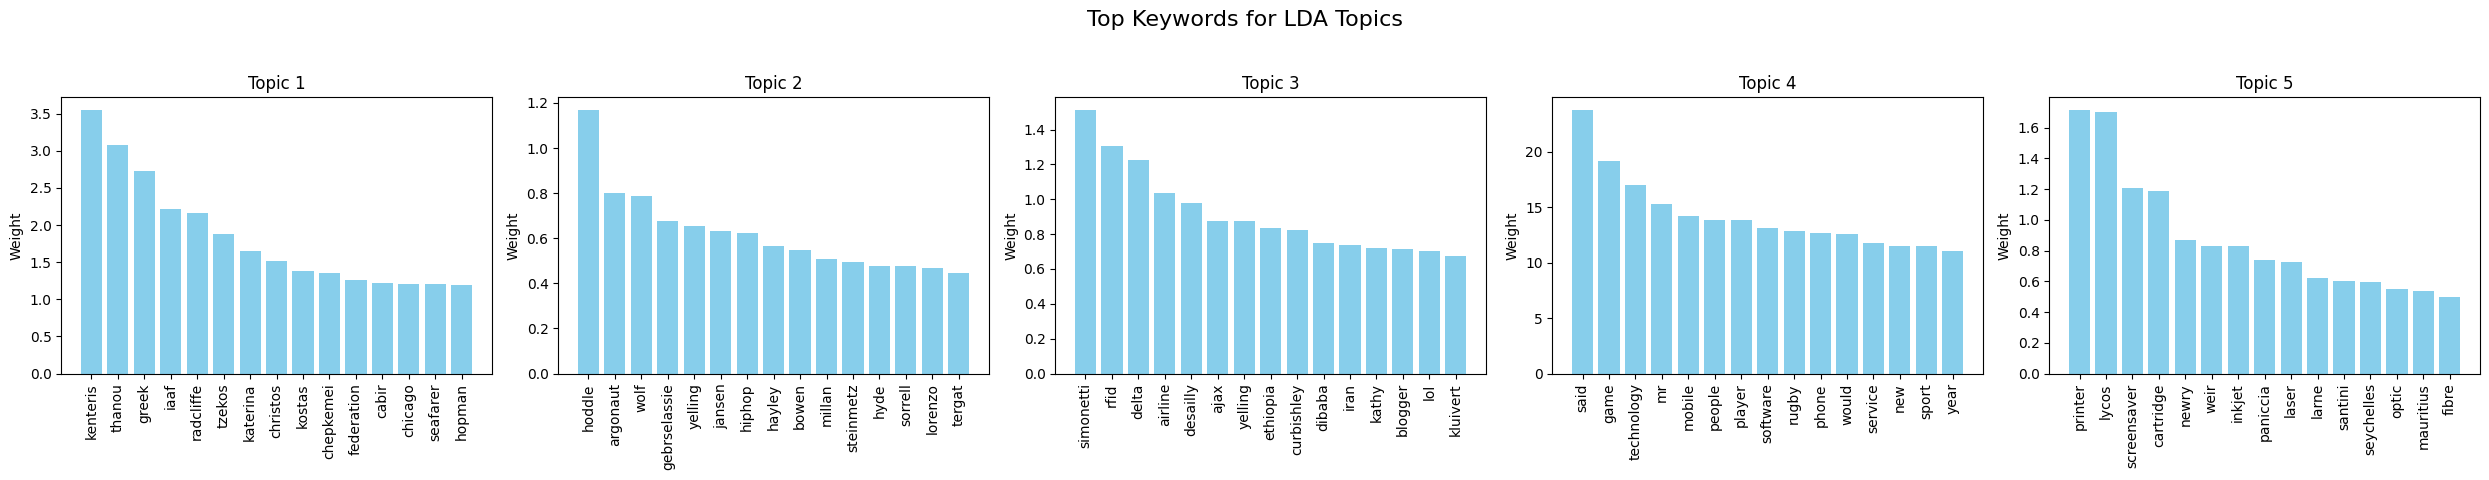

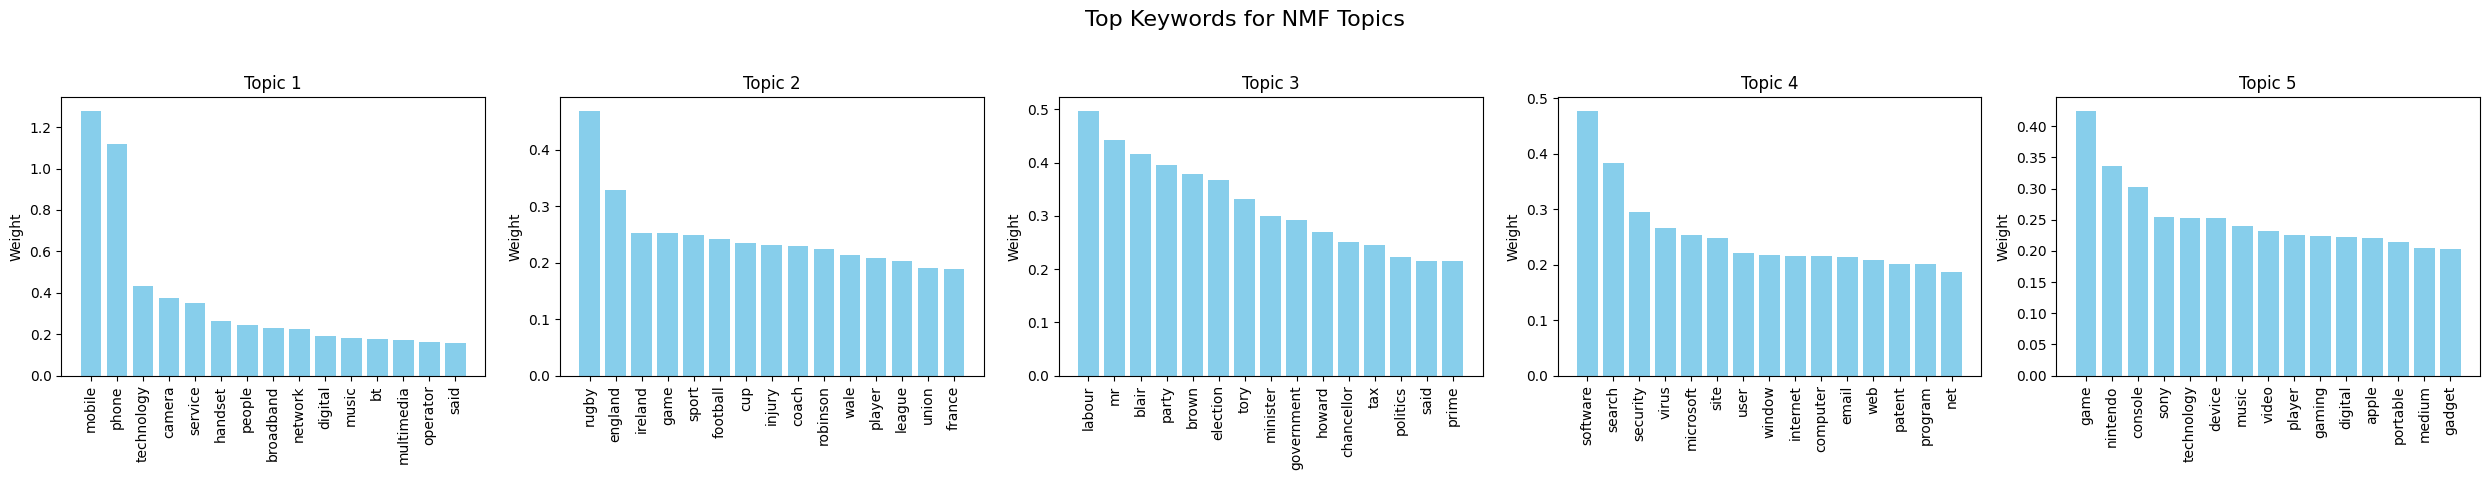

In [26]:
import matplotlib.pyplot as plt
import numpy as np

def plot_top_words(model, feature_names, n_top_words, title):
    """
    Plots the top words for each topic as a bar chart.

    Args:
        model: The fitted topic model (LDA or NMF).
        feature_names (list): The list of feature names (words).
        n_top_words (int): The number of top words to plot per topic.
        title (str): The title for the overall plot.
    """
    fig, axes = plt.subplots(1, model.n_components, figsize=(5 * model.n_components, 5), sharex=False)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[-n_top_words:][::-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.bar(top_features, weights, color='skyblue')
        ax.set_title(f"Topic {topic_idx + 1}")
        ax.tick_params(axis='x', rotation=90)
        ax.set_ylabel("Weight")

    fig.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

plot_top_words(lda_model, feature_names, n_top_words, "Top Keywords for LDA Topics")
plot_top_words(nmf_model, feature_names, n_top_words, "Top Keywords for NMF Topics")

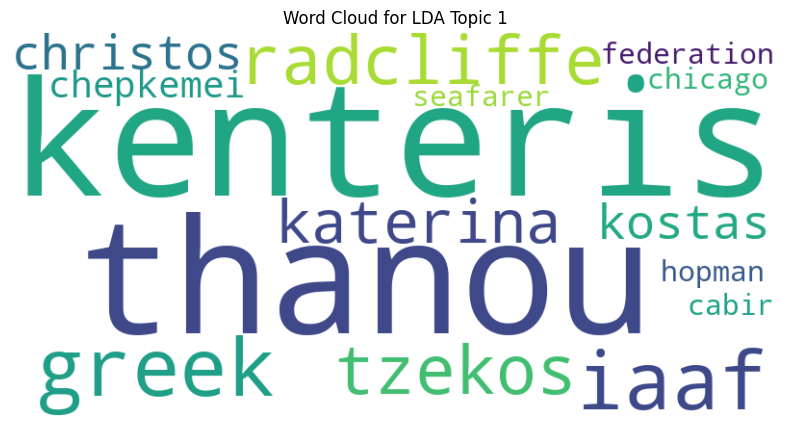

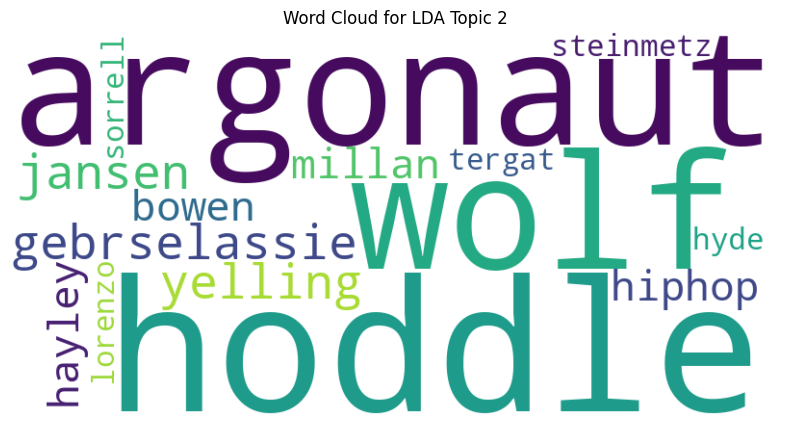

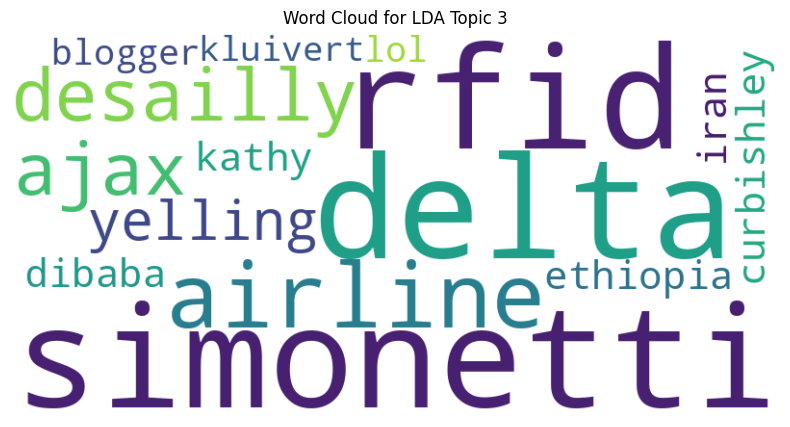

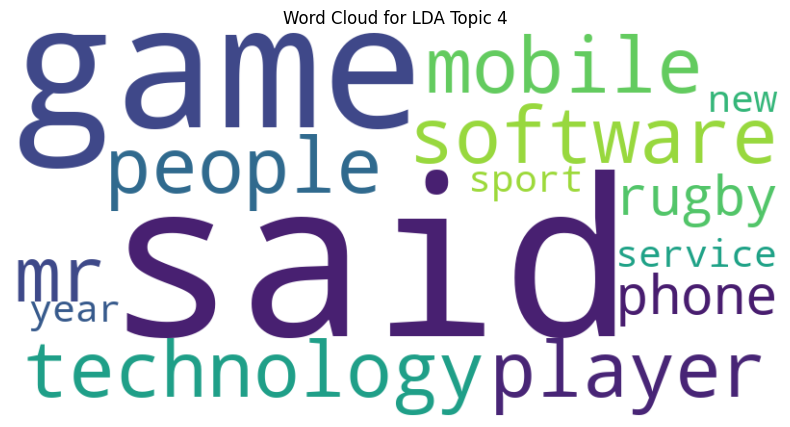

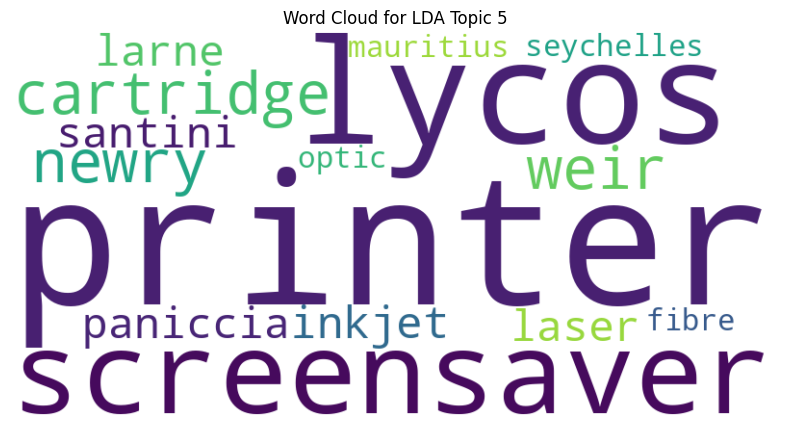

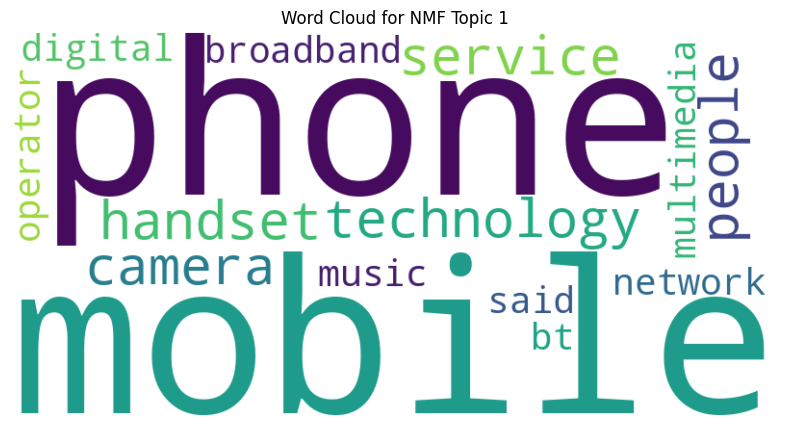

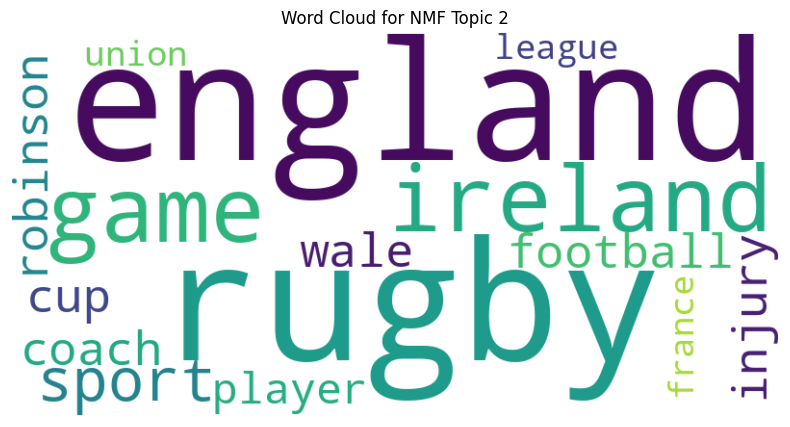

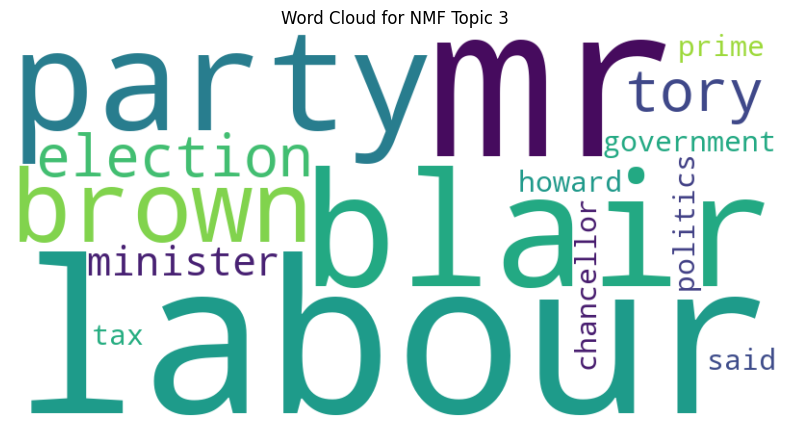

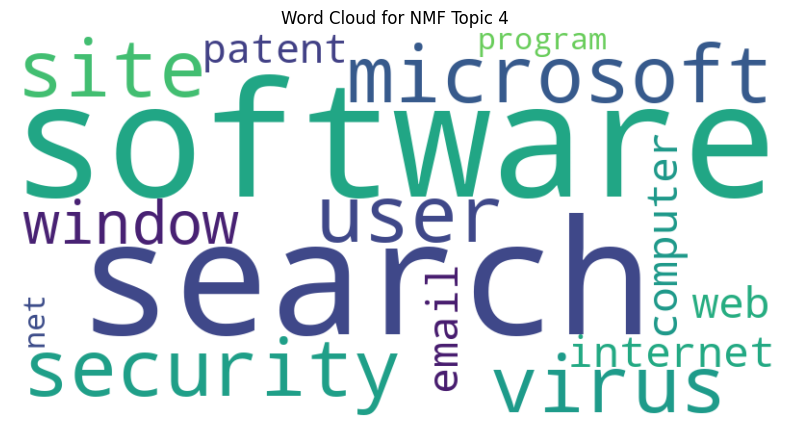

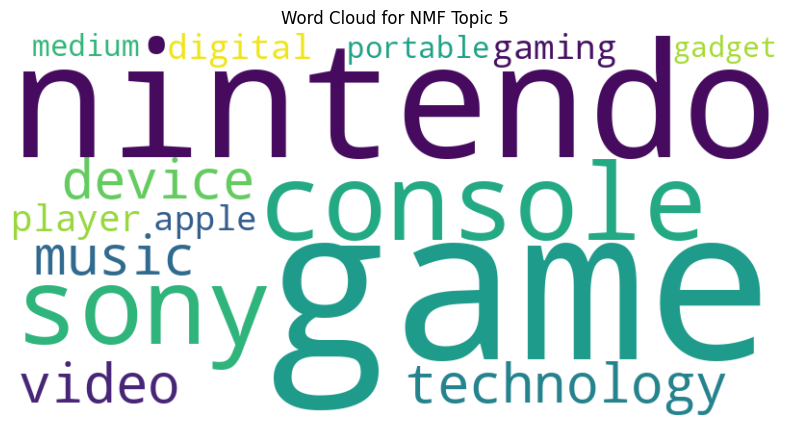

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(words, title):
    """
    Generates and displays a word cloud from a list of words.

    Args:
        words (list): A list of words for the word cloud.
        title (str): The title of the word cloud plot.
    """
    word_string = " ".join(words)
    wordcloud = WordCloud(width=800, height=400, background_color='white', random_state=42).generate(word_string)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

# Generate word clouds for LDA topics
for i, topic_words in enumerate(lda_top_words):
    generate_wordcloud(topic_words, f"Word Cloud for LDA Topic {i+1}")

# Generate word clouds for NMF topics
for i, topic_words in enumerate(nmf_top_words):
    generate_wordcloud(topic_words, f"Word Cloud for NMF Topic {i+1}")